In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import pytesseract

In [2]:

filePath = './imageFile/'
fileName = 'pic (2).jpg'
img_ori = cv2.imread(filePath + fileName)
# img_ori2 = cv2.imread(imagePath + 'pic (2).jpg', cv2.IMREAD_GRAYSCALE)

In [3]:
height, width, channel = img_ori.shape  # 컬러는 3개의 자료 반환
# height, width = img_ori2.shape            # 흑백은 2개의 자료 반환, 그래서 채널이 없다.

In [ ]:
# 잘 가져와졌나 확인해보기
plt.figure(figsize=(12, 10))
plt.axis('off')
plt.imshow(img_ori, cmap='gray')

hue/ saturation/ value
색상, 채도, 명도

참고 : 먼셀표색계 hvc
hue, value, chrome(채도)

In [ ]:
# 흑백으로 만들기 위해 hsv로 만들어서 value 채널만 사용하는 경우도 있다. 흑백으로 plot이 잘 되지 않는다
hsv = cv2.cvtColor(img_ori, cv2.COLOR_BGR2HSV)
gray = hsv[:,:,2]

print(gray)
plt.figure(figsize=(12,10))
plt.imshow(gray)

In [15]:
# gray = cv2.cvtColor(img_ori,cv2.COLOr_brg2gray)  # atrribute가 존재하지 않는다. 에러/ 아래 코드를 참조하시오.
# plt.figure(figsize=(12,10))
# plt.imshow(gray)

AttributeError: module 'cv2' has no attribute 'COLOR_BRG2GRAY'

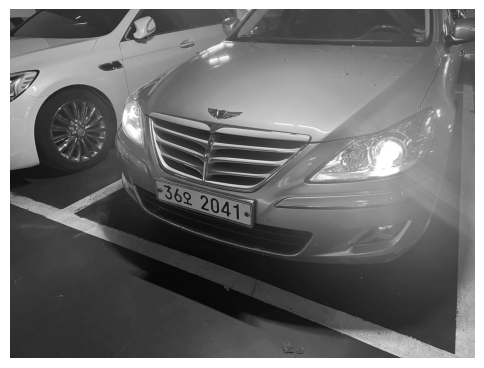

In [4]:
# 수정된 코드(흑백으로 출력되지 않는 이유를 모르겠다. 아래 코드로 수정되었음)
gray = cv2.cvtColor(img_ori, cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(6,5))
plt.axis('off')
plt.imshow(gray, cmap='gray')

In [ ]:
# img_ori3 = cv2.imread((filePath + fileName), 0)  # 흑백으로 가져오기
# imgray3 = cv2.cvtColor(img_ori3, cv2.IMREAD_GRAYSCALE)
# plt.figure(figsize=(12, 10))
# plt.axis('off')
# plt.imshow(imgray3)  # 주피터노트북에서는 plt.show() 생략가능

## Adaptive Thresholding
threshold : 기준점, 입구, 한계점
threshold value : 역치, 한계치

- 가우시안 블러 : 노이즈 줄이기

- 스레숄더 : 검은 것은 검게, 흰것은 희게 + 만화처럼 보이게 한다. 테두리만 나와서 컴퓨터가 쉽게 인식한다.

In [5]:
imgBlurred = cv2.GaussianBlur(gray, ksize=(5,5),sigmaX=0)


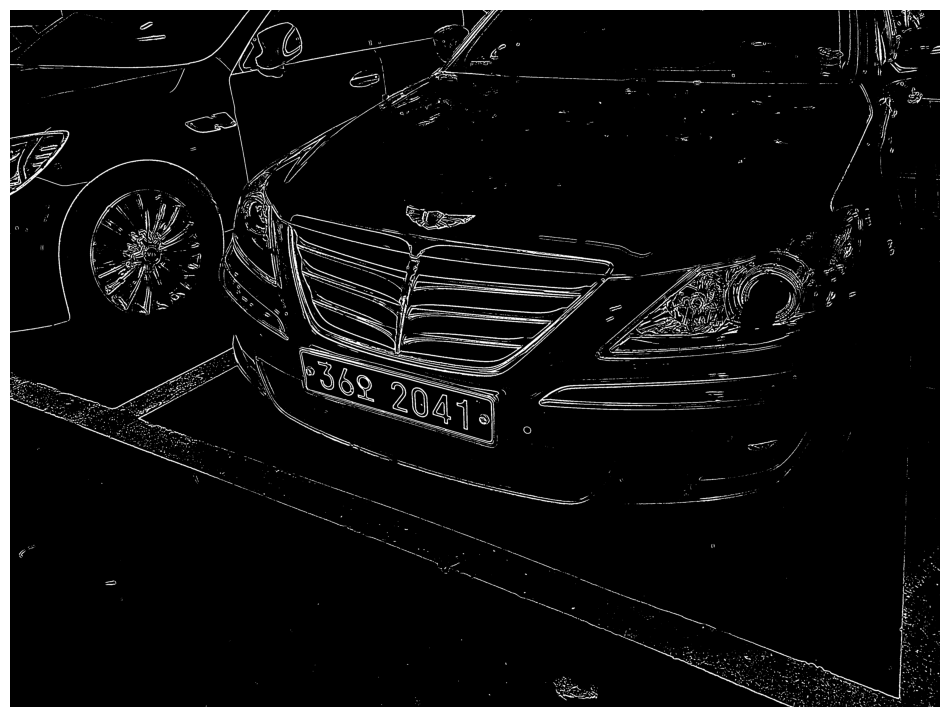

In [6]:
imgBlurThresh = cv2.adaptiveThreshold(imgBlurred,
    maxValue=255.0,
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    thresholdType=cv2.THRESH_BINARY_INV,
    blockSize=19,
    C=9)
# plt.figure(figsize=(12,10))
# plt.axis('off')
# plt.imshow(imgBlurThresh, cmap='gray')


`cv2.findContours()` 함수는 이미지에서 윤곽선(contour)을 찾아주는 함수입니다.

`cv2.findContours()` 함수는 세 개의 인수를 가집니다.

````python
contours, hierarchy = cv2.findContours(image, mode, method)

````
image: 입력 이미지. 8비트 이진 이미지이어야 합니다. cv2.threshold() 함수 등을 사용하여 이미지를 이진화 할 수 있습니다.
mode: 윤곽선을 찾을 방법을 지정합니다. 윤곽선이 외곽, 내곽, 중심선인지 등을 지정할 수 있습니다.
method: 윤곽선 근사화 방법을 지정합니다.
`cv2.findContours()` 함수는 두 개의 값(contours, hierarchy)을 반환합니다.

contours: 이미지에서 검출된 윤곽선들의 좌표 정보입니다. 각 윤곽선은 점들의 리스트로 표현됩니다.
hierarchy: 검출된 윤곽선들의 계층 구조 정보입니다. 윤곽선들 간의 관계를 나타내는 리스트입니다.
`cv2.findContours()` 함수에서 반환되는 contours 값은 Numpy 배열 형태로 반환되며, 각 윤곽선은 리스트의 요소로 저장됩니다. 윤곽선 리스트의 각 요소는 점들의 좌표값을 가진 Numpy 배열로 표현됩니다. 예를 들어, contours[0]은 첫 번째 윤곽선을 나타내는 Numpy 배열이 됩니다.

hierarchy 값은 검출된 윤곽선들의 계층 구조를 나타내는 Numpy 배열입니다. hierarchy[i]는 i번째 윤곽선의 계층 구조 정보를 담고 있는 리스트입니다. 이 리스트는 [next, previous, child, parent] 형태로 구성되며, 윤곽선간의 관계를 나타내는 값입니다.

예를 들어, [0, 1, -1, -1]은 다음(next) 윤곽선이 없음을 의미하고, [2, -1, -1, 0]은 다음 윤곽선이 2번 윤곽선이며, 이전(previous) 윤곽선이 없음을 의미합니다. -1은 해당 정보가 없음을 의미합니다.

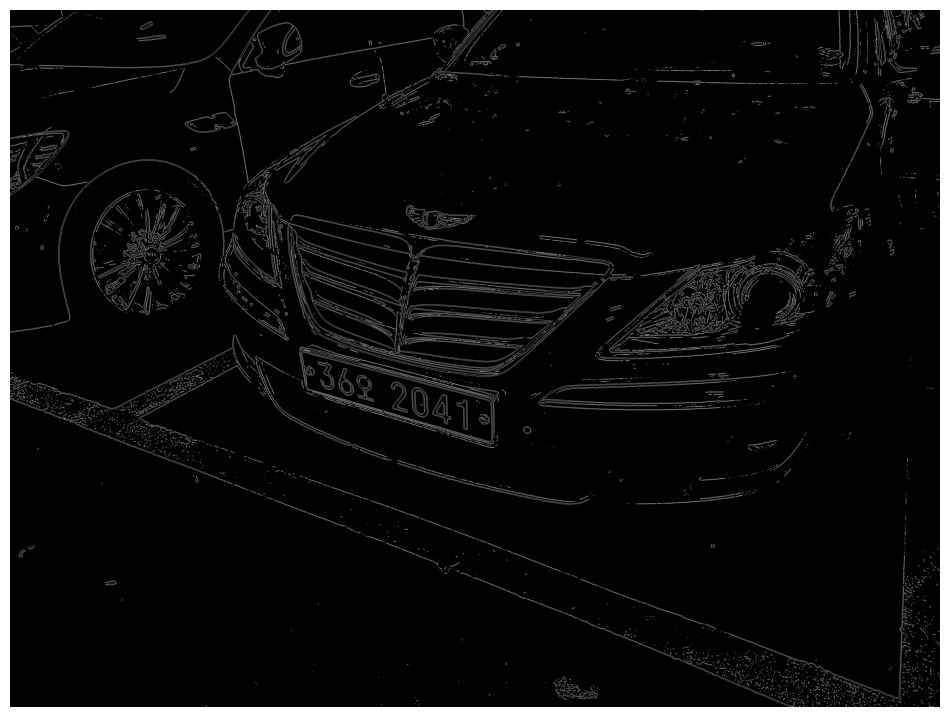

In [10]:
contours,_= cv2.findContours(
    imgBlurThresh,
    mode=cv2.RETR_LIST,
    method=cv2.CHAIN_APPROX_SIMPLE
)

tempResult = np.zeros((height, width, channel), dtype=np.uint8)

cv2.drawContours(tempResult, contours=contours, contourIdx=-1, color=(255,255,255))

plt.figure(figsize=(12,10))
plt.axis('off')
plt.imshow(tempResult)
